<a href="https://colab.research.google.com/github/sanghaiakshay/eip3/blob/master/eip3_session5_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!kill -9 -1

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

Using TensorFlow backend.


In [0]:
!ls

sample_data


### Define model 

In [0]:
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-1x4pd8gw
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-1x4pd8gw
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-gpslor3h/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [0]:
import keras
from classification_models.resnet import ResNet18, preprocess_input
from keras.datasets import cifar10

#X = preprocess_input(X)
n_classes = 10
batch_size = 32
num_classes = 10
epochs = 10
(x_train_org, y_train_org), (x_test_org, y_test_org) = cifar10.load_data()
print('x_train shape:', x_train_org.shape)
print(x_train_org.shape[0], 'train samples')
print(x_test_org.shape[0], 'test samples')

x_train = preprocess_input(x_train_org)
x_test = preprocess_input(x_test_org)

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train_org, n_classes)
y_test = keras.utils.to_categorical(y_test_org, n_classes)



# build model
base_model = ResNet18(input_shape=(32,32,3), weights='imagenet', include_top=False)
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])

# train
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
#model.fit(X, y)


170500096/170498071 [==============================] - 3s 0us/step


W0708 18:15:05.400507 140308587501440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 18:15:05.444913 140308587501440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 18:15:05.445924 140308587501440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0708 18:15:05.448285 140308587501440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0708 18:15:05.451747 140308

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


W0708 18:15:08.115822 140308587501440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0708 18:15:08.265268 140308587501440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



44924928/44920640 [==============================] - 1s 0us/step


W0708 18:15:11.861274 140308587501440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

In [0]:
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

W0708 18:15:21.269006 140308587501440 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 48s 964us/step - loss: 1.0034 - acc: 0.6564 - val_loss: 0.7104 - val_acc: 0.7500
Epoch 2/10
50000/50000 [==============================] - 43s 860us/step - loss: 0.6372 - acc: 0.7773 - val_loss: 0.6178 - val_acc: 0.7826
Epoch 3/10
50000/50000 [==============================] - 43s 854us/step - loss: 0.4989 - acc: 0.8253 - val_loss: 0.5774 - val_acc: 0.8031
Epoch 4/10
50000/50000 [==============================] - 43s 855us/step - loss: 0.3989 - acc: 0.8611 - val_loss: 0.5924 - val_acc: 0.8021
Epoch 5/10
50000/50000 [==============================] - 43s 857us/step - loss: 0.3199 - acc: 0.8878 - val_loss: 0.6008 - val_acc: 0.8075
Epoch 6/10
50000/50000 [==============================] - 43s 861us/step - loss: 0.2565 - acc: 0.9096 - val_loss: 0.6209 - val_acc: 0.8110
Epoch 7/10
50000/50000 [==============================] - 43s 856us/step - loss: 0.2053 - acc: 0.9277 - val_loss: 0.

### Plot images

In [0]:
import random

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test,axis=1)
misclassified_index = [i for i in range(len(y_test)) if y_test[i]!=y_pred[i] ]

res_list = random.sample(misclassified_index, 50)
print(res_list)

[87, 5698, 6792, 3995, 4276, 2703, 7224, 3724, 5910, 8546, 4301, 8815, 572, 685, 637, 7813, 8161, 1181, 5398, 9490, 3779, 3783, 7112, 3202, 5327, 4302, 9237, 6697, 9982, 2767, 2961, 2327, 870, 1261, 3668, 2746, 9681, 8111, 8898, 2845, 5115, 2232, 7792, 4901, 3560, 5582, 9148, 453, 8644, 7542]


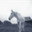

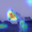

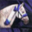

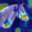

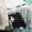

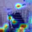

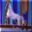

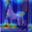

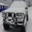

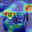

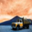

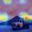

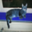

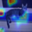

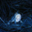

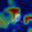

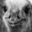

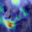

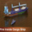

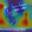

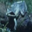

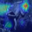

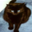

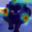

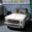

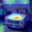

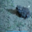

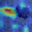

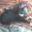

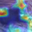

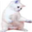

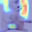

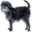

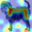

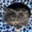

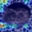

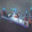

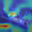

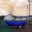

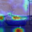

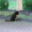

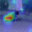

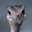

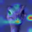

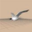

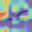

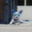

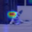

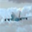

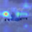

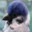

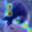

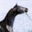

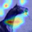

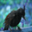

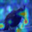

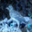

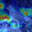

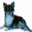

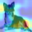

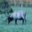

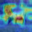

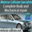

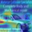

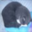

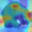

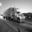

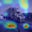

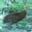

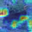

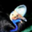

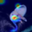

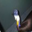

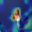

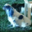

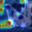

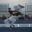

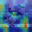

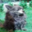

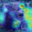

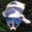

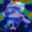

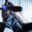

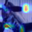

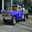

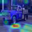

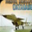

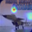

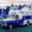

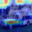

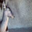

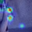

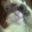

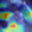

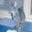

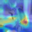

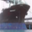

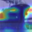

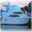

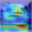

In [0]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

for ind in res_list:
  x = x_test[ind]
  x = np.expand_dims(x, axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("stage1_unit2_conv2")
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(64):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  
  img = x_test_org[ind]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  cv2_imshow(img)
  cv2_imshow(superimposed_img)
  cv2.waitKey(0)

###Test cells

In [0]:
x = x_test[16]
  x = np.expand_dims(x, axis=0)
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("stage2_unit2_conv1")

In [0]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(128):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

In [0]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

(4, 4)


(32, 32, 3)


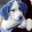

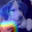

-1

In [0]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
#img = cv2.imread(img_path)
img = x_test_org[16]
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
print(img.shape)
cv2_imshow(img)
cv2_imshow(superimposed_img)
cv2.waitKey(0)

In [0]:
print(img)
print(heatmap)

[[[ 91  64  30]
  [ 82  58  30]
  [ 87  73  59]
  ...
  [ 22  13  13]
  [ 22  15  13]
  [ 18  13  10]]

 [[ 94  65  34]
  [ 79  56  30]
  [ 90  78  59]
  ...
  [ 36  19   7]
  [ 61  46  32]
  [ 47  36  26]]

 [[ 94  66  39]
  [ 86  65  40]
  [120 105  82]
  ...
  [ 54  33  14]
  [ 82  64  42]
  [ 59  46  32]]

 ...

 [[106  97  88]
  [103  96  86]
  [103  99  88]
  ...
  [ 20  34  52]
  [ 14  37  43]
  [ 21  32  55]]

 [[114 103  91]
  [114 104  92]
  [120 110  98]
  ...
  [ 36  47  61]
  [ 37  50  55]
  [ 22  30  51]]

 [[136 121 106]
  [131 115 100]
  [133 114 100]
  ...
  [ 80  84  92]
  [ 78  72  76]
  [ 28  31  50]]]
[[[168   0   0]
  [168   0   0]
  [168   0   0]
  ...
  [168   0   0]
  [168   0   0]
  [168   0   0]]

 [[168   0   0]
  [168   0   0]
  [168   0   0]
  ...
  [168   0   0]
  [168   0   0]
  [168   0   0]]

 [[168   0   0]
  [168   0   0]
  [168   0   0]
  ...
  [168   0   0]
  [168   0   0]
  [168   0   0]]

 ...

 [[168   0   0]
  [168   0   0]
  [168   0   0]
  ..

In [0]:
from PIL import Image
img = Image.open(img_path)
print(img.size)

(700, 500)


In [0]:
lst = [1,2,3]
lst.extend([4,5])
lst.append([6,7])
print(lst)

[1, 2, 3, 4, 5, [6, 7]]


In [0]:
# [filter size, stride, padding]
#Assume the two dimensions are the same
#Each kernel requires the following parameters:
# - k_i: kernel size
# - s_i: stride
# - p_i: padding (if padding is uneven, right padding will higher than left padding; "SAME" option in tensorflow)
# 
#Each layer i requires the following parameters to be fully represented: 
# - n_i: number of feature (data layer has n_1 = imagesize )
# - j_i: distance (projected to image pixel distance) between center of two adjacent features
# - r_i: receptive field of a feature in layer i
# - start_i: position of the first feature's receptive field in layer i (idx start from 0, negative means the center fall into padding)

import math
convnet =   [[3,1,0],[3,1,0],[2,2,0],[3,2,2],[3,2,2],[2,2,0],[3,1,0],[3,1,0],[3,1,0],[2,2,0], [3,2,2],[3,2,2],[3,2,2],[2,2,0],[3,1,0],[3,1,0],[3,1,0],[2,2,0],[4096,1,0],[4096,1,0],[4096,1,0]]
layer_names = ['conv1','conv2','pool1','conv3','conv4','pool2','conv5','conv6','conv7','pool3','conv8','conv9','conv10','pool4','conv11','conv12','conv13','pool5','fc1', 'fc2','fc3']
imsize = 224

def outFromIn(conv, layerIn):
  n_in = layerIn[0]
  j_in = layerIn[1]
  r_in = layerIn[2]
  start_in = layerIn[3]
  k = conv[0]
  s = conv[1]
  p = conv[2]
  
  n_out = math.floor((n_in - k + 2*p)/s) + 1
  actualP = (n_out-1)*s - n_in + k 
  pR = math.ceil(actualP/2)
  pL = math.floor(actualP/2)
  
  j_out = j_in * s
  r_out = r_in + (k - 1)*j_in
  start_out = start_in + ((k-1)/2 - pL)*j_in
  return n_out, j_out, r_out, start_out
  
def printLayer(layer, layer_name):
  print(layer_name + ":")
  print("\t n features: %s \n \t jump: %s \n \t receptive size: %s \t start: %s " % (layer[0], layer[1], layer[2], layer[3]))
 
layerInfos = []
if __name__ == '__main__':
#first layer is the data layer (image) with n_0 = image size; j_0 = 1; r_0 = 1; and start_0 = 0.5
  print ("-------Net summary------")
  currentLayer = [imsize, 1, 1, 0.5]
  printLayer(currentLayer, "input image")
  for i in range(len(convnet)):
    currentLayer = outFromIn(convnet[i], currentLayer)
    layerInfos.append(currentLayer)
    printLayer(currentLayer, layer_names[i])
  print ("------------------------")
  

-------Net summary------
input image:
	 n features: 224 
 	 jump: 1 
 	 receptive size: 1 	 start: 0.5 
conv1:
	 n features: 222 
 	 jump: 1 
 	 receptive size: 3 	 start: 1.5 
conv2:
	 n features: 220 
 	 jump: 1 
 	 receptive size: 5 	 start: 2.5 
pool1:
	 n features: 110 
 	 jump: 2 
 	 receptive size: 6 	 start: 3.0 
conv3:
	 n features: 56 
 	 jump: 4 
 	 receptive size: 10 	 start: 3.0 
conv4:
	 n features: 29 
 	 jump: 8 
 	 receptive size: 18 	 start: 3.0 
pool2:
	 n features: 14 
 	 jump: 16 
 	 receptive size: 26 	 start: 15.0 
conv5:
	 n features: 12 
 	 jump: 16 
 	 receptive size: 58 	 start: 31.0 
conv6:
	 n features: 10 
 	 jump: 16 
 	 receptive size: 90 	 start: 47.0 
conv7:
	 n features: 8 
 	 jump: 16 
 	 receptive size: 122 	 start: 63.0 
pool3:
	 n features: 4 
 	 jump: 32 
 	 receptive size: 138 	 start: 71.0 
conv8:
	 n features: 3 
 	 jump: 64 
 	 receptive size: 202 	 start: 71.0 
conv9:
	 n features: 3 
 	 jump: 128 
 	 receptive size: 330 	 start: 7.0 
conv10